In [ ]:
!pip install git+https://github.com/ageitgey/face_recognition_models

  Cloning https://github.com/ageitgey/face_recognition_models to /tmp/pip-req-build-1p7e2970
  Running command git clone -q https://github.com/ageitgey/face_recognition_models /tmp/pip-req-build-1p7e2970
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=54cf45d332c5c329376fcf56cf977e2ba74fcc3f884a5eeadc671aa29e612703
  Stored in directory: /tmp/pip-ephem-wheel-cache-bibl6ic5/wheels/0e/43/bc/eeadfb1a85c256c03f93bd26b361adc3ff0d2a8e7f1b481a80
Successfully built face-recognition-models


In [ ]:
!pip install face_recognition

In [ ]:
import face_recognition
import cv2
import numpy as np
import pickle
import operator
import os

In [ ]:
# Loading of pickle file for feature extraction of the uploaded dataset

with open('celeb_embedding_large.pickle', 'rb') as f:
    data = pickle.load(f)
f.close()

In [ ]:
# Loading of test image

frame = cv2.imread('tu.jpg')
rgb_frame = frame[:, :, ::-1]
rgb_frame


array([[[228, 228, 228],
        [230, 230, 230],
        [231, 231, 231],
        ...,
        [189, 186, 179],
        [185, 185, 177],
        [183, 183, 175]],

       [[229, 229, 229],
        [230, 230, 230],
        [230, 230, 230],
        ...,
        [189, 186, 179],
        [185, 185, 177],
        [184, 184, 176]],

       [[227, 227, 227],
        [228, 228, 228],
        [227, 227, 227],
        ...,
        [187, 184, 177],
        [186, 183, 174],
        [185, 182, 173]],

       ...,

       [[ 27,  33,  33],
        [ 29,  35,  35],
        [ 24,  33,  32],
        ...,
        [139, 131, 118],
        [140, 132, 119],
        [136, 128, 115]],

       [[ 29,  35,  35],
        [ 35,  41,  41],
        [ 31,  40,  39],
        ...,
        [140, 132, 121],
        [141, 135, 121],
        [139, 133, 119]],

       [[ 28,  34,  34],
        [ 35,  41,  41],
        [ 34,  43,  42],
        ...,
        [138, 130, 119],
        [139, 133, 119],
        [139, 133, 119]]

In [ ]:
known_face_encodings = data["embeddings"]
known_face_imgpath = data["paths"]
known_face_names = data["names"]

In [ ]:
face_location = face_recognition.face_locations(rgb_frame,number_of_times_to_upsample=0, model ="cnn")
#face_location=dlib.rectangle(face_location[0][3],face_location[0][0],face_location[0][1],face_location[0][2])
print(face_location)
face_encodings = face_recognition.face_encodings(rgb_frame, face_location)

print(face_encodings)

[(669, 1443, 1077, 1036)]
[array([-0.18032822,  0.04266737,  0.08261798, -0.06760848, -0.12302238,
        0.00643729, -0.07775692, -0.08453527,  0.13996771, -0.12221447,
        0.19063786, -0.05105104, -0.17990752, -0.02404753, -0.03302463,
        0.20956305, -0.13078725, -0.0897745 , -0.05475674, -0.0678433 ,
       -0.01092403, -0.03616004,  0.00291147,  0.05122692, -0.16267857,
       -0.37681741, -0.05533246, -0.05688711,  0.0201428 , -0.01803408,
       -0.07515715,  0.1129376 , -0.16586083, -0.05484464,  0.07119948,
        0.17765105, -0.08035366, -0.01197769,  0.20973022, -0.00385224,
       -0.257471  , -0.00047905,  0.13310388,  0.27273348,  0.18096106,
        0.05061655,  0.0554878 , -0.08655884,  0.17028132, -0.26548976,
        0.06845465,  0.14408875,  0.07869529,  0.06804129,  0.07659072,
       -0.10976245,  0.0125889 ,  0.14498369, -0.19308127,  0.03002801,
        0.054147  , -0.05161309, -0.03477519, -0.08222374,  0.27434769,
        0.16421932, -0.14500961, -0.1

In [ ]:
# Loop through each face in this frame of photos 
l=[]
for (top, right, bottom, left), face_encoding in zip(face_location, face_encodings):
  dist=np.linalg.norm(known_face_encodings - face_encoding , axis=1)
  i=0
  for i in dist[i]:
    if i<=0.6:
     l.append(True)
    else:
      l.append(False)
  name = "Unknown"
  counts = {}
  # euclidien distance for comparing distance
  face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
  k=dist.min()
  index = np.where(dist == k)
  result = min(int(j) for i in index for j in i) 
  best_name = known_face_names[result]
  img_path = known_face_imgpath[result]
  img_path1 = best_name + '/' + img_path
  print(img_path1)
  print("Least distance name : ",best_name)

Vidya_Balan/Vidya_Balan_6.jpg
Least distance name :  Vidya_Balan


In [ ]:
directory_pth = 'drive/My Drive/dataset'

Celeb_imagePth = os.path.join(directory_pth, img_path1) 
print(Celeb_imagePth)

drive/My Drive/dataset/Vidya_Balan/Vidya_Balan_6.jpg


In [ ]:
import cv2

celeb_img = cv2.imread(Celeb_imagePth)
print(celeb_img)
celeb_img = cv2.resize(celeb_img, (360, 420))
test_img = cv2.resize(frame, (360, 420))

[[[173 198 224]
  [173 198 224]
  [172 198 222]
  ...
  [217 236 251]
  [216 235 250]
  [216 235 250]]

 [[172 197 223]
  [172 197 223]
  [171 197 221]
  ...
  [217 236 251]
  [216 235 250]
  [216 235 250]]

 [[171 196 222]
  [170 195 221]
  [170 196 220]
  ...
  [216 235 250]
  [216 235 250]
  [216 235 250]]

 ...

 [[120 155 195]
  [119 154 194]
  [119 155 193]
  ...
  [203 222 237]
  [203 222 237]
  [203 222 237]]

 [[120 155 195]
  [119 154 194]
  [119 155 193]
  ...
  [203 222 237]
  [203 222 237]
  [203 222 237]]

 [[120 155 195]
  [120 155 195]
  [119 155 193]
  ...
  [204 223 238]
  [203 222 237]
  [203 222 237]]]


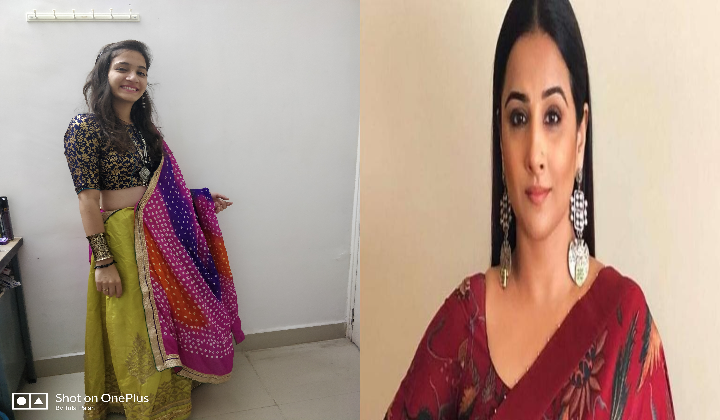

In [ ]:
#@title Default title text
from google.colab.patches import cv2_imshow

img_concate_Hori=np.concatenate((test_img,celeb_img),axis=1)
cv2_imshow(img_concate_Hori)
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()